In [ ]:
def adjust_gamma(image, gamma = 1.0):
    #build a lookup table mapping the pixel values [0. 255] to their adjusted
    #gamma values. 
    invGamma = 1.0/ gamma
    table = np.array([((i/255.0)** invGamma) *255
        for i in np.arange(0, 256)]).astype("uint8")
    #apply gamma correction using the lookup table. 
    return cv2.LUT(image, table)


In [ ]:
import numpy as np
import cv2

img = cv2.imread('../ImageProcessing/ImageProcessing/Underexposed.jpg')

grayunderexposed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('image', grayunderexposed)

gamma = 0.5
adjusted = adjust_gamma(grayunderexposed, gamma=gamma)
cv2.putText(adjusted, "g={}".format(gamma), (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
cv2.imshow("gammam image 1", adjusted)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from matplotlib import pyplot as plt

plt.hist(gray.ravel(),256,[0,256])
plt.show()

In [ ]:
plt.hist(adjusted.ravel(),256,[0,256])
plt.show()

In [ ]:
import numpy as np
import cv2

img = cv2.imread('../ImageProcessing/ImageProcessing/Overexposed.jpg')

grayoverexposed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('overexposedimage', grayoverexposed)

gamma = 0.5
adjusted = adjust_gamma(gray, gamma=gamma)
cv2.putText(adjusted, "g={}".format(gamma), (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
cv2.imshow("gammam image 2", adjusted)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from matplotlib import pyplot as plt

plt.hist(grayoverexposed.ravel(),256,[0,256])
plt.show()

In [ ]:
plt.hist(adjustednew.ravel(),256,[0,256])
plt.show()

In [3]:
#Question 2
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('../ImageProcessing/ImageProcessing/Underexposed.jpg')

grayunderexposed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.imshow('image', grayunderexposed)
underimg = cv2.equalizeHist(grayunderexposed)

plt.hist(underimg.ravel(),256,[0,256])
plt.show()


<Figure size 640x480 with 1 Axes>

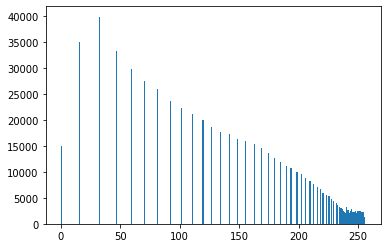

In [4]:
img = cv2.imread('../ImageProcessing/ImageProcessing/Overexposed.jpg')

grayoverexposed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('image', grayoverexposed)
overimg = cv2.equalizeHist(grayunderexposed)

plt.hist(overimg.ravel(),256,[0,256])
plt.show()